# ============================================================
# ARIMA untuk Forecast Penjualan/Stok Ayam Potong (14 hari ke depan)
# ============================================================

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pathlib import Path


In [9]:
possible_paths = [
    Path("notebooks/processed_for_model/ts_ayam_potong_clean.csv"),
    Path("processed_for_model/ts_ayam_potong_clean.csv"),
]
file_path = None
for p in possible_paths:
    if p.exists():
        file_path = str(p)
        break
if file_path is None:
    raise FileNotFoundError("Tidak menemukan ts_ayam_potong_clean.csv di path umum.")


In [10]:
df = pd.read_csv(file_path, parse_dates=['date'])
df = df.set_index('date').sort_index()
if 'Ayam_Potong' not in df.columns:
    raise KeyError("Kolom 'Ayam_Potong' tidak ditemukan di data.")


In [11]:
print("Head data:")
print(df.head())
print("\nInfo:")
print(df.info())


Head data:
            Ayam_Potong
date                   
2024-01-01        0.000
2024-01-02       23.120
2024-01-03       12.760
2024-01-04       37.040
2024-01-05       53.675

Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2024-01-01 to 2024-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ayam_Potong  366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB
None


# -------------------------------
# Visualisasi Data
# -------------------------------

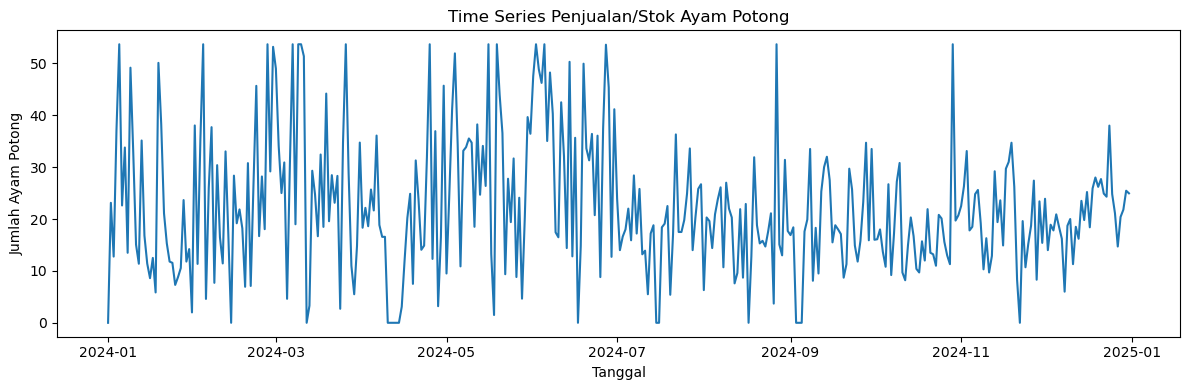

In [12]:

plt.figure(figsize=(12, 4))
plt.plot(df['Ayam_Potong'])
plt.title("Time Series Penjualan/Stok Ayam Potong")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Ayam Potong")
plt.tight_layout()
plt.show()

# -------------------------------
# Model ARIMA
# -------------------------------

In [13]:
series = df['Ayam_Potong']

model = ARIMA(series, order=(1, 1, 1))
model_fit = model.fit()

print("\nRingkasan Model ARIMA(1,1,1):")
print(model_fit.summary())


Ringkasan Model ARIMA(1,1,1):
                               SARIMAX Results                                
Dep. Variable:            Ayam_Potong   No. Observations:                  366
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1440.513
Date:                Mon, 24 Nov 2025   AIC                           2887.025
Time:                        00:19:14   BIC                           2898.725
Sample:                    01-01-2024   HQIC                          2891.675
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1021      0.052      1.963      0.050       0.000       0.204
ma.L1         -0.9141      0.023    -40.514      0.000      -0.958      -0.870
sigma2       156.1631

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


# -------------------------------
# Forecasting 14 Hari Kedepan
# -------------------------------

In [14]:
n_forecast = 14
forecast_values = model_fit.forecast(steps=n_forecast)
# Pastikan index bertipe datetime untuk operasi tanggal
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)
last_date = pd.to_datetime(df.index.max())
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1),
                             periods=n_forecast,
                             freq='D')

In [15]:
forecast_series = pd.Series(forecast_values,
                            index=future_dates,
                            name="Forecast_Ayam_Potong")

print("\nForecast 14 hari ke depan:")
print(forecast_series)



Forecast 14 hari ke depan:
2025-01-01    22.884023
2025-01-02    22.673047
2025-01-03    22.651502
2025-01-04    22.649302
2025-01-05    22.649077
2025-01-06    22.649054
2025-01-07    22.649052
2025-01-08    22.649052
2025-01-09    22.649052
2025-01-10    22.649052
2025-01-11    22.649052
2025-01-12    22.649052
2025-01-13    22.649052
2025-01-14    22.649052
Freq: D, Name: Forecast_Ayam_Potong, dtype: float64


# -------------------------------
# Plot Data Historis + Forecast
# -------------------------------


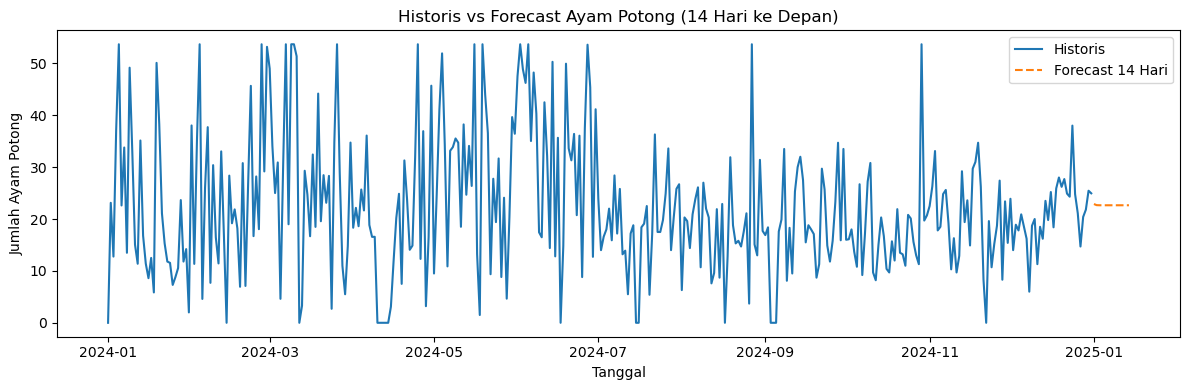

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(df['Ayam_Potong'], label='Historis')
plt.plot(forecast_series, label='Forecast 14 Hari', linestyle='--')
plt.title("Historis vs Forecast Ayam Potong (14 Hari ke Depan)")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Ayam Potong")
plt.legend()
plt.tight_layout()
plt.show()


# -------------------------------
# Simpan Forecast ke CSV
# -------------------------------

In [17]:
output_forecast = forecast_series.reset_index()
output_forecast.columns = ['date', 'Forecast_Ayam_Potong']

output_forecast.to_csv("forecast_ayam_potong_14hari.csv", index=False)
print("\nForecast sudah disimpan ke: forecast_ayam_potong_14hari.csv")


Forecast sudah disimpan ke: forecast_ayam_potong_14hari.csv
